In [7]:
# Question: How does the attack of Charizard compare to other first generation Pokemon?
# The type of observational study I plan to conduct is a retrospective study. Since first generation Pokemon were created when Pokemon was first created in 1996, we're looking at already existing data that we aren't able to change to affect our study.
# I will be examining the full population of first-gen Pokemon to see how they compare with the amount of attack and defense that Charizard can perform.
# My data set originated from Mrs. Spindt, and she picked out the variables she wanted to add to her dataset and with the help of AI she was able to collect the information for each of the variables.
# Some biases that may come with this dataset could include the variables that Mrs. Spindt chose to be important. Since she was also using AI to assist her with the data collection, we wouldn't know for sure whether the data the AI collected is completely accurate or not.

Q1 (25th percentile): 51.0
Q3 (75th percentile): 95.0
IQR: 44.0
Mean: 74.52980132450331
Median: 70.0
Mode: 65
Minimum Attack: 5
Maximum Attack: 155


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


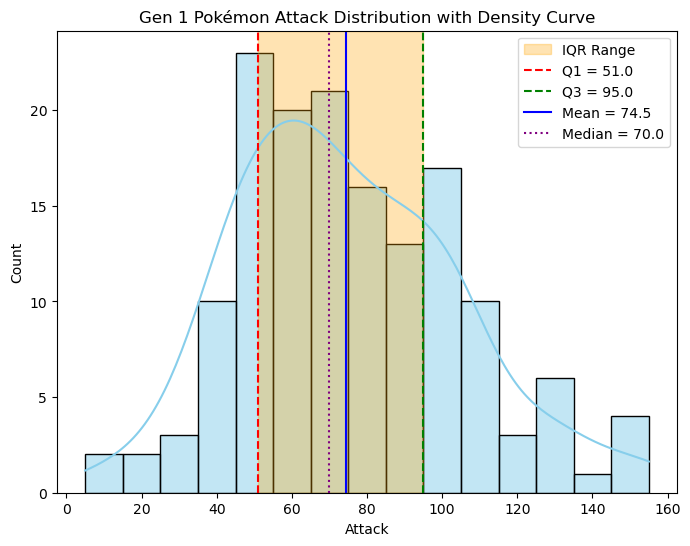

IQR: 44.0
Standard Deviation: 29.86364745461609
Range: 150


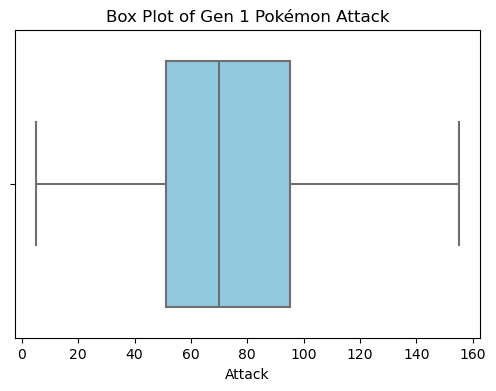


Charizard Info:
        name  pokedex_number                 abilities  attack capture_rate  \
5  Charizard               6  ['Blaze', 'Solar Power']     104           45   

   classfication  defense  height_m  hp  sp_attack  sp_defense  speed type1  \
5  Flame Pokémon       78       1.7  78        159         115    100  fire   

    type2  weight_kg  generation  is_legendary  
5  flying       90.5           1             0  
Charizard's Attack (104) is at the 84.11th percentile of Gen 1 Pokémon.
Charizard's Attack Z-score: 0.99

Analysis:
Most Gen 1 Pokemon have Attack values between 51 and 95, showing that the majority are decently average attackers.
The data shows Pokemon with very low and very high Attack values, resulting in a wide spread.
Charizard’s Attack is 104, which puts him above the 84.11th percentile.
This means his Attack is higher than at least three fourths of all first-gen Pokemon.
Even though he isn't the strongest, Charizard is ranked towards the top of first-gen

In [8]:
# imports + variables
import pandas as pd
df = pd.read_csv("pokemon - all.csv")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Display first rows
df.head()

# Filter out only Generation 1 Pokémon
gen1_df = df[df["generation"] == 1]

# Compute quartiles and IQR
q1 = gen1_df["attack"].quantile(0.25)
q3 = gen1_df["attack"].quantile(0.75)
iqr = q3 - q1
min_attack = gen1_df["attack"].min()
max_attack = gen1_df["attack"].max()

# Compute measures of central tendency
mean_attack = gen1_df["attack"].mean()
median_attack = gen1_df["attack"].median()
mode_attack = gen1_df["attack"].mode()[0]  # first mode if multiple

print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")
print(f"IQR: {iqr}")
print(f"Mean: {mean_attack}")
print(f"Median: {median_attack}")
print(f"Mode: {mode_attack}")
print(f"Minimum Attack: {min_attack}")
print(f"Maximum Attack: {max_attack}")

# Plot histogram + density curve
plt.figure(figsize=(8,6))
sns.histplot(gen1_df["attack"], bins=15, kde=True, color="skyblue", edgecolor="black")  

# Shade the IQR region
plt.axvspan(q1, q3, color="orange", alpha=0.3, label="IQR Range")

# Add lines for Q1, Q3, mean, median
plt.axvline(q1, color="red", linestyle="--", label=f"Q1 = {q1:.1f}")
plt.axvline(q3, color="green", linestyle="--", label=f"Q3 = {q3:.1f}")
plt.axvline(mean_attack, color="blue", linestyle="-", label=f"Mean = {mean_attack:.1f}")
plt.axvline(median_attack, color="purple", linestyle=":", label=f"Median = {median_attack:.1f}")

plt.xlabel("Attack")
plt.ylabel("Count")
plt.title("Gen 1 Pokémon Attack Distribution with Density Curve")
plt.legend()
plt.show()

# Measures of spread
std_dev = gen1_df["attack"].std()
range_attack = max_attack - min_attack

print(f"IQR: {iqr}")
print(f"Standard Deviation: {std_dev}")
print(f"Range: {range_attack}")

# --- Box plot ---
plt.figure(figsize=(6,4))
sns.boxplot(x=gen1_df["attack"], color="skyblue")
plt.title("Box Plot of Gen 1 Pokémon Attack")
plt.xlabel("Attack")
plt.show()

# Charizard info
charizard_info = df[df["name"] == "Charizard"]
charizard_attack = charizard_info["attack"].values[0]
print("\nCharizard Info:")
print(charizard_info)

# Percentile rank for Charizard's Attack
charizard_percentile = stats.percentileofscore(gen1_df["attack"], charizard_attack)
print(f"Charizard's Attack ({charizard_attack}) is at the {charizard_percentile:.2f}th percentile of Gen 1 Pokémon.")

# Z-score for Charizard's Attack
charizard_z = (charizard_attack - mean_attack) / std_dev
print(f"Charizard's Attack Z-score: {charizard_z:.2f}")

# 5 number summary, conclusion
print("\nAnalysis:")
print("Most Gen 1 Pokemon have Attack values between {:.0f} and {:.0f}, showing that the majority are decently average attackers.".format(q1, q3))
print("The data shows Pokemon with very low and very high Attack values, resulting in a wide spread.")
print("Charizard’s Attack is {}, which puts him above the {:.2f}th percentile.".format(charizard_attack, charizard_percentile))
print("This means his Attack is higher than at least three fourths of all first-gen Pokemon.")
print("Even though he isn't the strongest, Charizard is ranked towards the top of first-gen Pokemon when it comes to Attack.")
print("His z-score of {:.2f} shows he is about {:.2f} standard deviations above the average Gen 1 Pokémon in Attack.".format(charizard_z, charizard_z))